<a href="https://colab.research.google.com/github/J-Salt/IDS/blob/main/HW3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing and Installing necessary packages**

---

In [3]:
import pandas as pd
from tabulate import tabulate

In [1]:
pip install mysql-connector-python

     |████████████████████████████████| 37.6 MB 1.2 MB/s 


In [2]:
import mysql.connector as sql

# **Connecting to mySQL and importing the table**

In [33]:
db_connection = sql.connect(host='208.109.18.154', database='ids5db', user='ids5', password='Bwx2822')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM Life_Expectancy')

table_rows = db_cursor.fetchall()

life_expect_df = pd.DataFrame(table_rows)

life_expect_df.columns = ['Country', 'Year', 'Life Expectancy', 'Adult Mortality', 'Alcohol Consumption', 'Percent Expenditure', 'BMI', 'Total Expenditure', 'GDP', 'Population', 'Schooling']
#print(tabulate(life_expect_df, headers='keys', tablefmt='fancy_grid'))  -Commented out to save space, but this was used to confirm the table was imported and created correctly


# **Testing the correlation between life expectancy and various factors**


---

By using matplotlib, we can plot different values to see if there is a correlation between the two values. We also use a linear regression to graph a best fit line to aid in this analysis.

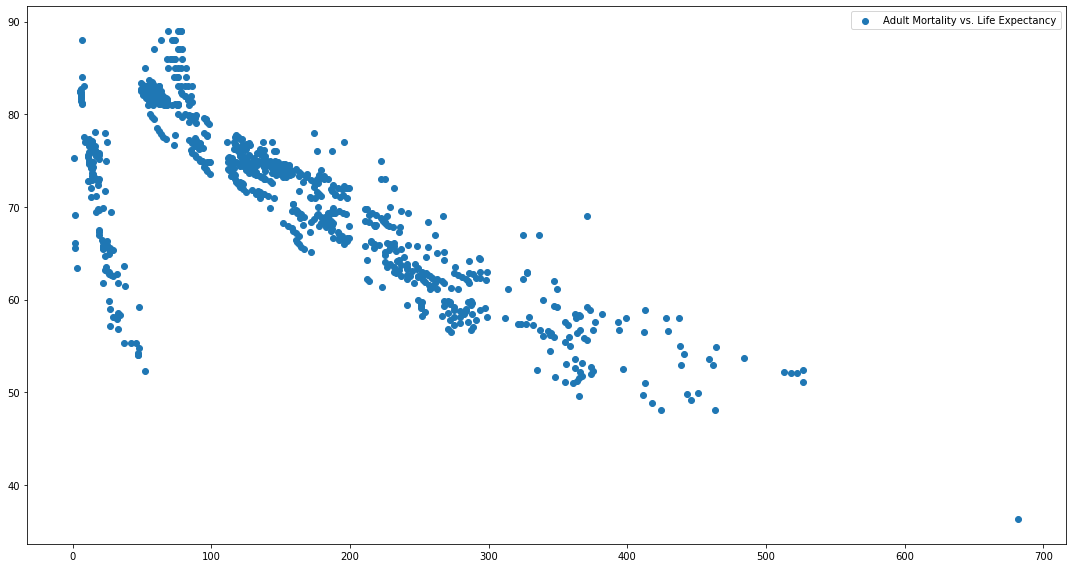

In [34]:
#Imports
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

#Set up plot
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True


subLifeExpect = life_expect_df.iloc[:] #gets all of the rows

plt.scatter(subLifeExpect['Adult Mortality'], subLifeExpect['Life Expectancy'], label="Adult Mortality vs. Life Expectancy") #creates scatter plot for adult mortality vs life expectancy
plt.legend()


plt.show() #displays the plot

## BMI vs Life Expectancy

The slope:  [[0.22542728]]
The intercept:  [61.54951629]
MSE:  57.371759366803325
R2:  0.2726796845200391


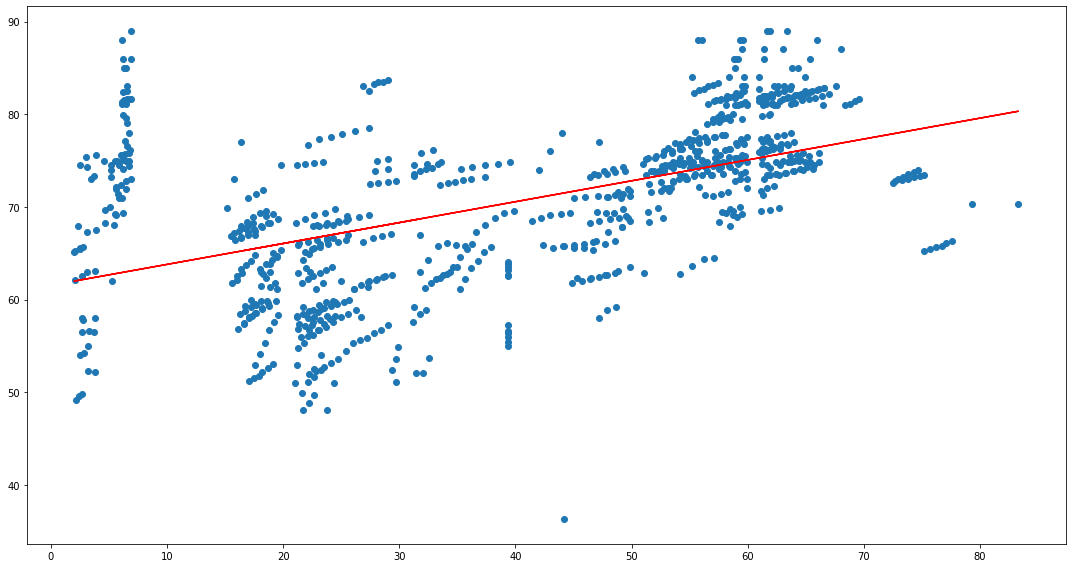

In [27]:
X = life_expect_df.iloc[:, 6].values.reshape(-1,1) #grabs all rows of BMI
Y = life_expect_df.iloc[:, 2].values.reshape(-1,1) #grabs all rows of life expectancy

LRmodel = LinearRegression() #creates the model

LRmodel.fit(X, Y) #fits the model to the points

Y_pred = LRmodel.predict(X) #creates predictions for Y


plt.scatter(X, Y) #creates the scatter plot
plt.plot(X, Y_pred, color='red')  #draws the linear regression line


print("The slope: ", LRmodel.coef_) #prints slope of linear regression
print("The intercept: ", LRmodel.intercept_) #prints y-intercept of linear regression

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred)) #prints the mean squared error
print("R2: ", r2_score(Y, Y_pred)) #prints the r2 score

## Alcohol Consumption vs Life Expectancy

The slope:  [[1.02459767]]
The intercept:  [66.12905862]
MSE:  63.85472783756602
R2:  0.19049300024467264


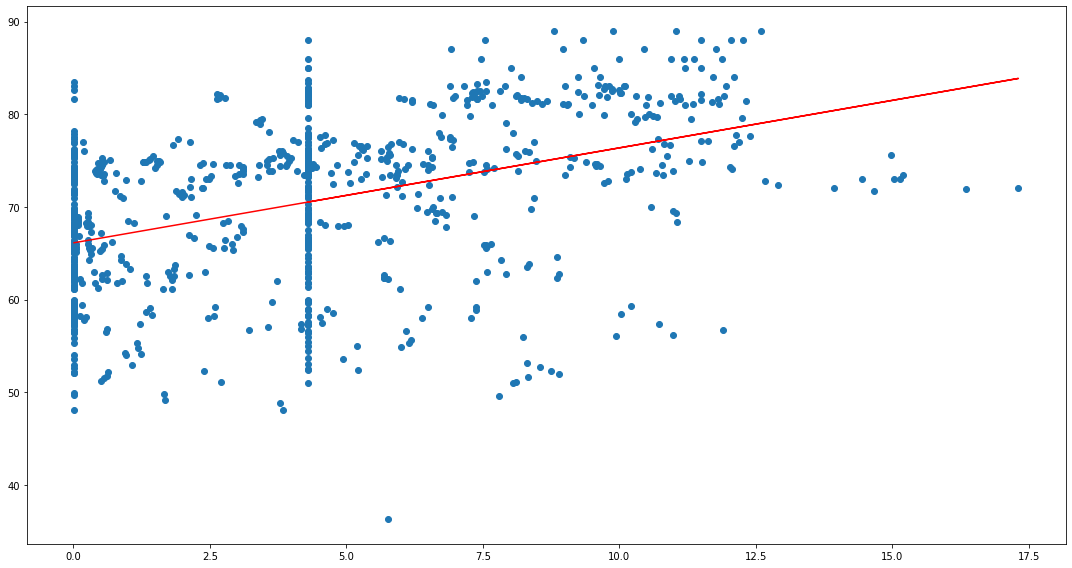

In [28]:
X = life_expect_df.iloc[:, 4].values.reshape(-1,1) #grabs all rows of alcohol consumption
Y = life_expect_df.iloc[:, 2].values.reshape(-1,1) #grabs all rows of life expectancy

LRmodel = LinearRegression() #creates the model

LRmodel.fit(X, Y) #fits the model to the points

Y_pred = LRmodel.predict(X) #creates predictions for Y


plt.scatter(X, Y) #creates the scatter plot
plt.plot(X, Y_pred, color='red')  #draws the linear regression line


print("The slope: ", LRmodel.coef_) #prints slope of linear regression
print("The intercept: ", LRmodel.intercept_) #prints y-intercept of linear regression

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred)) #prints the mean squared error
print("R2: ", r2_score(Y, Y_pred)) #prints the r2 score

## Schooling vs Life Expectancy

The slope:  [[2.32932063]]
The intercept:  [41.15398235]
MSE:  28.930988261197868
R2:  0.633232521688067


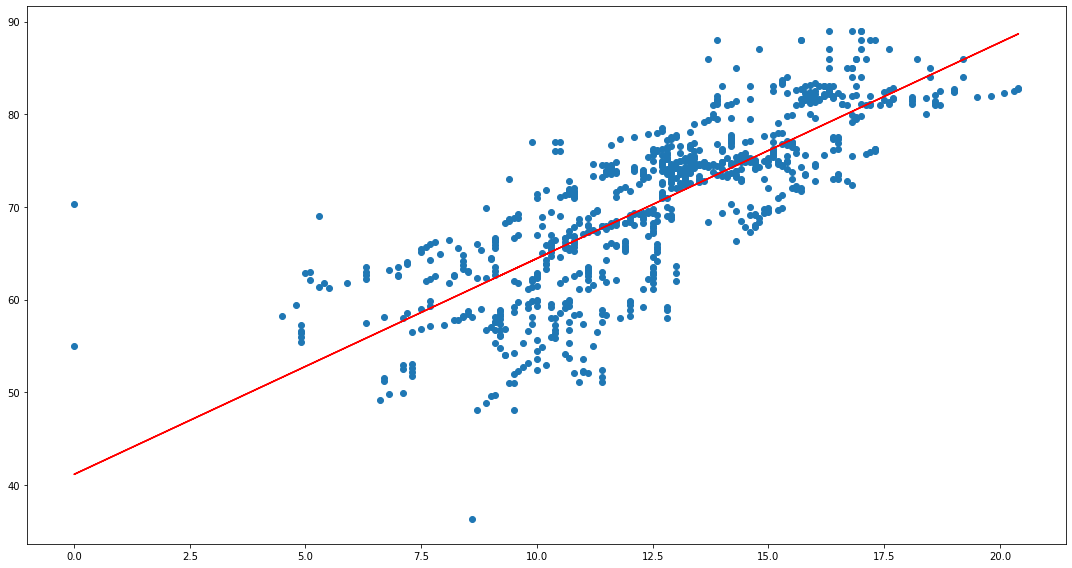

In [29]:
X = life_expect_df.iloc[:, 10].values.reshape(-1,1) #grabs all rows of schooling (social factors)
Y = life_expect_df.iloc[:, 2].values.reshape(-1,1) #grabs all rows of life expectancy

LRmodel = LinearRegression() #creates the model

LRmodel.fit(X, Y) #fits the model to the points

Y_pred = LRmodel.predict(X) #creates predictions for Y


plt.scatter(X, Y) #creates the scatter plot
plt.plot(X, Y_pred, color='red')  #draws the linear regression line


print("The slope: ", LRmodel.coef_) #prints slope of linear regression
print("The intercept: ", LRmodel.intercept_) #prints y-intercept of linear regression

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred)) #prints the mean squared error
print("R2: ", r2_score(Y, Y_pred)) #prints the r2 score

## GDP vs Life Expectancy

The slope:  [[0.00027976]]
The intercept:  [68.37469563]
MSE:  61.76516206526969
R2:  0.2169831001386996


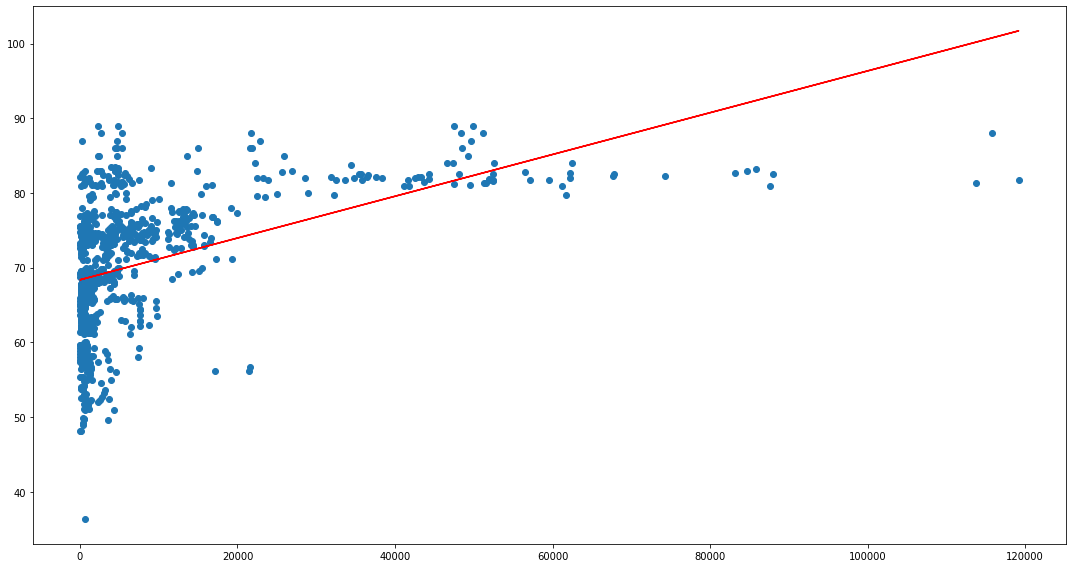

In [30]:
X = life_expect_df.iloc[:, 8].values.reshape(-1,1) #grabs all rows of GDP (economic factors)
Y = life_expect_df.iloc[:, 2].values.reshape(-1,1) #grabs all rows of life expectancy

LRmodel = LinearRegression() #creates the model

LRmodel.fit(X, Y) #fits the model to the points

Y_pred = LRmodel.predict(X) #creates predictions for Y


plt.scatter(X, Y) #creates the scatter plot
plt.plot(X, Y_pred, color='red')  #draws the linear regression line


print("The slope: ", LRmodel.coef_) #prints slope of linear regression
print("The intercept: ", LRmodel.intercept_) #prints y-intercept of linear regression

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred)) #prints the mean squared error
print("R2: ", r2_score(Y, Y_pred)) #prints the r2 score

## % Expenditure vs Life Expectancy

The slope:  [[0.00144934]]
The intercept:  [69.28682153]
MSE:  67.19986168764358
R2:  0.14808565847908461


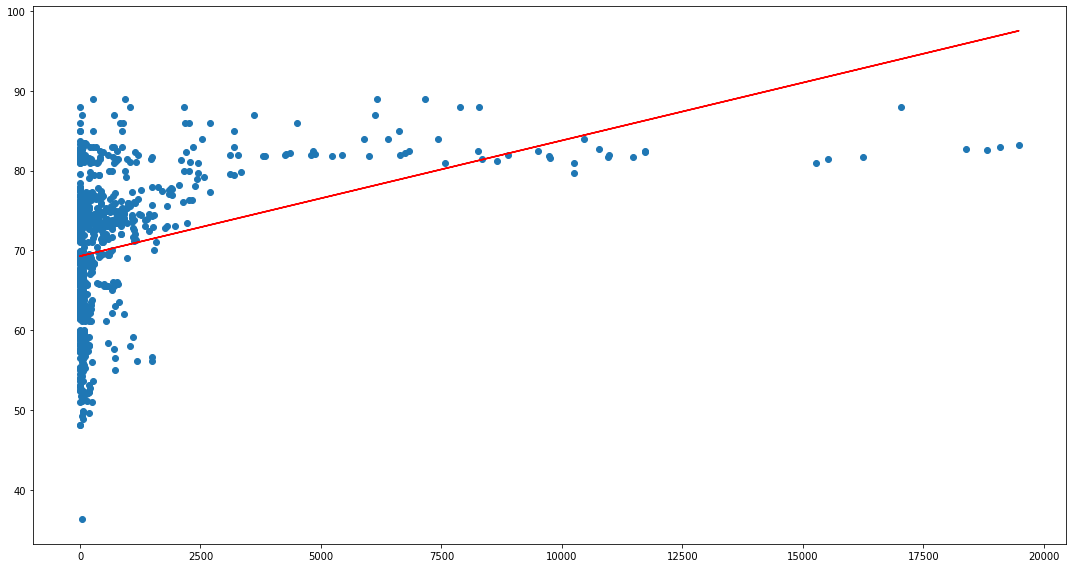

In [31]:
X = life_expect_df.iloc[:, 5].values.reshape(-1,1) #grabs all rows of percent expenditure
Y = life_expect_df.iloc[:, 2].values.reshape(-1,1) #grabs all rows of life expectancy

LRmodel = LinearRegression() #creates the model

LRmodel.fit(X, Y) #fits the model to the points

Y_pred = LRmodel.predict(X) #creates predictions for Y


plt.scatter(X, Y) #creates the scatter plot
plt.plot(X, Y_pred, color='red')  #draws the linear regression line


print("The slope: ", LRmodel.coef_) #prints slope of linear regression
print("The intercept: ", LRmodel.intercept_) #prints y-intercept of linear regression

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred)) #prints the mean squared error
print("R2: ", r2_score(Y, Y_pred)) #prints the r2 score

## Total Expenditure vs Life Expectancy

The slope:  [[0.41348749]]
The intercept:  [68.3974701]
MSE:  77.00300429699331
R2:  0.02380805475872705


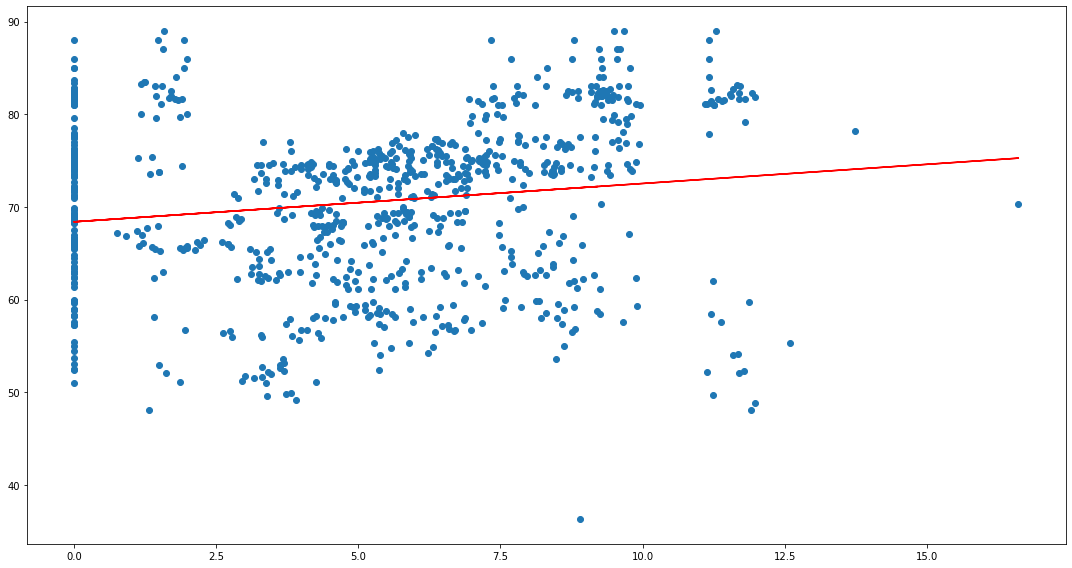

In [24]:
X = life_expect_df.iloc[:, 7].values.reshape(-1,1) #grabs all rows of total expenditure (economic factor)
Y = life_expect_df.iloc[:, 2].values.reshape(-1,1) #grabs all rows of life expectancy

LRmodel = LinearRegression() #creates the model

LRmodel.fit(X, Y) #fits the model to the points

Y_pred = LRmodel.predict(X) #creates predictions for Y


plt.scatter(X, Y) #creates the scatter plot
plt.plot(X, Y_pred, color='red')  #draws the linear regression line

print("The slope: ", LRmodel.coef_) #prints slope of linear regression
print("The intercept: ", LRmodel.intercept_) #prints y-intercept of linear regression

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred)) #prints the mean squared error
print("R2: ", r2_score(Y, Y_pred)) #prints the r2 score

The slope:  [[-1.27131305e-08]]
The intercept:  [70.69110731]
MSE:  78.81127334489464
R2:  0.0019559558102054675


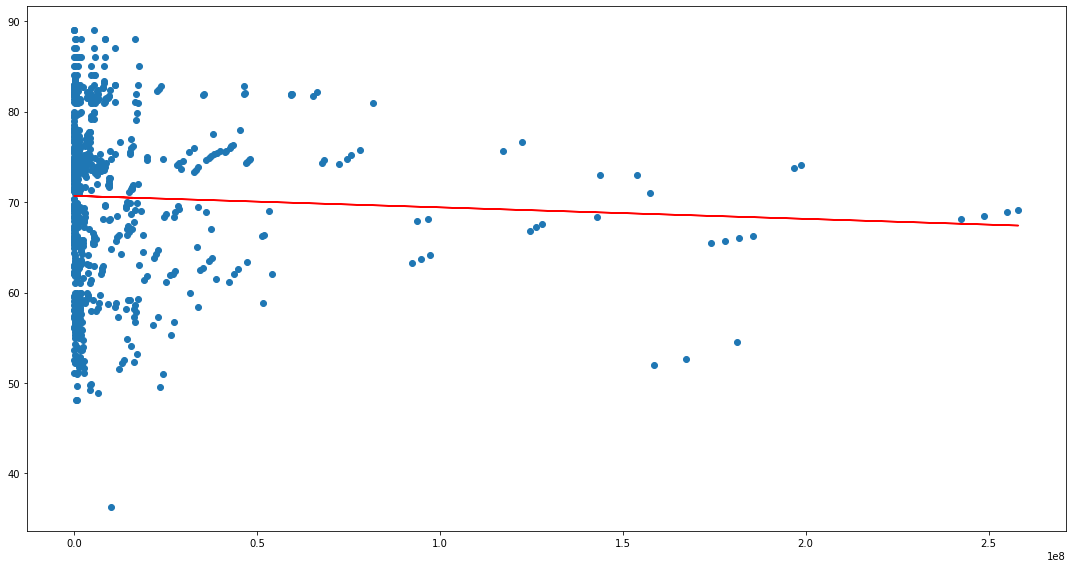

In [35]:
X = life_expect_df.iloc[:, 9].values.reshape(-1,1) #grabs all rows of population
Y = life_expect_df.iloc[:, 2].values.reshape(-1,1) #grabs all rows of life expectancy

LRmodel = LinearRegression() #creates the model

LRmodel.fit(X, Y) #fits the model to the points

Y_pred = LRmodel.predict(X) #creates predictions for Y


plt.scatter(X, Y) #creates the scatter plot
plt.plot(X, Y_pred, color='red')  #draws the linear regression line

print("The slope: ", LRmodel.coef_) #prints slope of linear regression
print("The intercept: ", LRmodel.intercept_) #prints y-intercept of linear regression

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred)) #prints the mean squared error
print("R2: ", r2_score(Y, Y_pred)) #prints the r2 score